<a href="https://colab.research.google.com/github/gladysbabs/Time-Series/blob/main/Project_3_(Core)_Gladys_Babirye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Part1-Loading the Data

In [3]:
df=pd.read_csv('/content/drive/MyDrive/CodingDojo/02-IntroML/Week08/Data/Crimes_-_2001_to_Present.csv')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915115 entries, 0 to 915114
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    915115 non-null  int64  
 1   Case Number           915115 non-null  object 
 2   Date                  915115 non-null  object 
 3   Block                 915115 non-null  object 
 4   IUCR                  915115 non-null  object 
 5   Primary Type          915115 non-null  object 
 6   Description           915115 non-null  object 
 7   Location Description  909986 non-null  object 
 8   Arrest                915115 non-null  bool   
 9   Domestic              915115 non-null  bool   
 10  Beat                  915115 non-null  int64  
 11  District              915114 non-null  float64
 12  Ward                  914854 non-null  float64
 13  Community Area        914857 non-null  float64
 14  FBI Code              915115 non-null  object 
 15  

## Holidays

In [5]:
import holidays
import datetime as dt
from holidays import country_holidays

In [6]:
## making a date range that covers full dataset
all_days = pd.date_range(df["Date"].min(), df["Date"].max())
all_days

DatetimeIndex(['2001-01-01 14:00:00', '2001-01-02 14:00:00',
               '2001-01-03 14:00:00', '2001-01-04 14:00:00',
               '2001-01-05 14:00:00', '2001-01-06 14:00:00',
               '2001-01-07 14:00:00', '2001-01-08 14:00:00',
               '2001-01-09 14:00:00', '2001-01-10 14:00:00',
               ...
               '2023-12-21 14:00:00', '2023-12-22 14:00:00',
               '2023-12-23 14:00:00', '2023-12-24 14:00:00',
               '2023-12-25 14:00:00', '2023-12-26 14:00:00',
               '2023-12-27 14:00:00', '2023-12-28 14:00:00',
               '2023-12-29 14:00:00', '2023-12-30 14:00:00'],
              dtype='datetime64[ns]', length=8399, freq='D')

In [7]:
#converting the date column to datetime:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915115 entries, 0 to 915114
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    915115 non-null  int64         
 1   Case Number           915115 non-null  object        
 2   Date                  915115 non-null  datetime64[ns]
 3   Block                 915115 non-null  object        
 4   IUCR                  915115 non-null  object        
 5   Primary Type          915115 non-null  object        
 6   Description           915115 non-null  object        
 7   Location Description  909986 non-null  object        
 8   Arrest                915115 non-null  bool          
 9   Domestic              915115 non-null  bool          
 10  Beat                  915115 non-null  int64         
 11  District              915114 non-null  float64       
 12  Ward                  914854 non-null  float64       
 13 

In [8]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')

## Getting US holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]

# For a specific subdivisions (e.g. state or province):
md_holidays = country_holidays('US', subdiv='MD')

## Saving both holiday types as columns in the original
df["US Holiday"] = [us_holidays.get(day) for day in df['Date']]
df['MD Holiday'] = [md_holidays.get(day) for day in df['Date']]
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,US Holiday,MD Holiday
0,11037294,JA371270,2015-03-18 12:00:00,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,11,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN,None,None
1,11646293,JC213749,2018-12-20 15:00:00,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,11,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None
2,11645836,JC212333,2016-05-01 00:25:00,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,11,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None
3,11645959,JC211511,2018-12-20 16:00:00,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,08A,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None
4,11645601,JC212935,2014-06-01 00:01:00,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,11,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None


### 2 forms of the data:

In [9]:
#The original individual crime data with a datetime index. (Each row is 1 crime)
df_dt = df.set_index("Date")
df_dt.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,US Holiday,MD Holiday
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 12:00:00,11037294,JA371270,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,...,11,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN,None,None
2018-12-20 15:00:00,11646293,JC213749,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,...,11,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,...,11,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None
2018-12-20 16:00:00,11645959,JC211511,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,...,08A,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None
2014-06-01 00:01:00,11645601,JC212935,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,...,11,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,None,None


In [10]:
#A resampled/converted crime counts version (Each row is 1 day)
df_Daily_rs=df_dt.resample("D").sum()
df_Daily_rs.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,US Holiday,MD Holiday
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,213499956,HL717150JG467702JH183931JF211964HL648777HL8026...,056XX S WOLCOTT AVE045XX N CENTRAL PARK AVE032...,0840028117530281084011201753084008401754026608...,THEFTCRIMINAL SEXUAL ASSAULTOFFENSE INVOLVING ...,FINANCIAL ID THEFT: OVER $300NON-AGGRAVATEDSEX...,APARTMENTRESIDENCEAPARTMENTRESIDENCERESIDENCEB...,3,9,34287,...,0602020206100206060202060602170611060606170206...,17401429.0,28292439.0,54027.0,03/31/2006 10:03:38 PM10/21/2023 03:42:03 PM03...,627.649808,-1315.320534,"(41.790485769, -87.671628682)(41.664387922, -8...",New Year's DayNew Year's DayNew Year's DayNew ...,New Year's DayNew Year's DayNew Year's DayNew ...
2001-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0,0.000000,0.000000,0,0,0
2001-01-03,4522762,HM109864,021XX N MULLIGAN AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,0,0,2512,...,06,1133767.0,1913726.0,2001.0,03/31/2006 10:03:38 PM,41.919476,-87.783953,"(41.919476449, -87.783952789)",0,0
2001-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0,0.000000,0.000000,0,0,0
2001-01-05,8865046,HL640440HM107916,021XX S MICHIGAN AVE026XX N WASHTENAW AVE,11200840,DECEPTIVE PRACTICETHEFT,FORGERYFINANCIAL ID THEFT: OVER $300,CREDIT UNIONRESIDENCE,0,0,1545,...,1006,2335528.0,3807818.0,4002.0,03/31/2006 10:03:38 PM03/31/2006 10:03:38 PM,83.783734,-175.318694,"(41.85414395, -87.623702902)(41.929589854, -87...",0,0


# Task

## Topic 1) Comparing Police Districts

In [11]:
#Filter the DataFrame for crimes in 2022
df_2022 = df_dt.loc['2022']

- Which district had the most crimes in 2022?

In [12]:
district_crime_counts = df_2022.groupby('District').size()

# Find the district with the highest aggregated count
district_most_crime = district_crime_counts.idxmax()
most_crime_count = district_crime_counts.max()

# Print the result
print(f"The district with the most aggregated crimes in 2022 is District {district_most_crime} "
      f"with {most_crime_count} occurrences.")


The district with the most aggregated crimes in 2022 is District 8.0 with 14243 occurrences.


- Which district had the least crimes in 2022?

In [13]:
# Find the district with the least count
district_least_crime = district_crime_counts.idxmin()
least_crime_count = district_crime_counts.min()

# Print the result
print(f"The district with the least crimes in 2022 is District {district_least_crime} "
      f"with {least_crime_count} occurrences.")

The district with the least crimes in 2022 is District 31.0 with 15 occurrences.


## Topic 2) Crimes Across the Years:

In [14]:
## Engineering Features using components of the date/time
df_dt['Year']  = df_dt.index.year

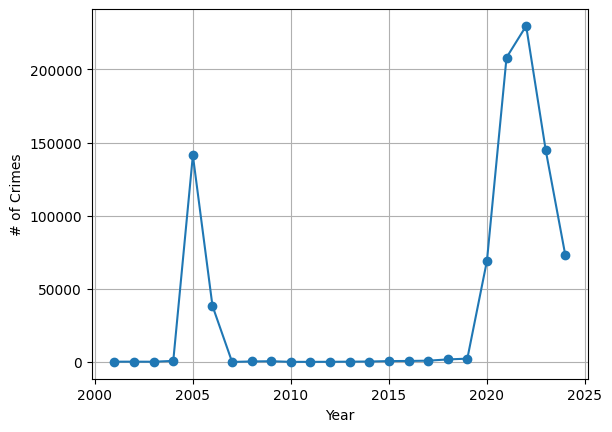

In [15]:
## save year counts
year_counts = df_dt['Year'].value_counts().sort_index()
#The plot
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

- Is the total number of crimes increasing or decreasing across the years?
    - Basing on the graph above it looks like crime rate has predominantly assumed a declining rate over periods between 2000-2004, 2006-2019 and 2023. Ofcourse with afew occassional spikes in 2005 and a growth between 2020-2022.

- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

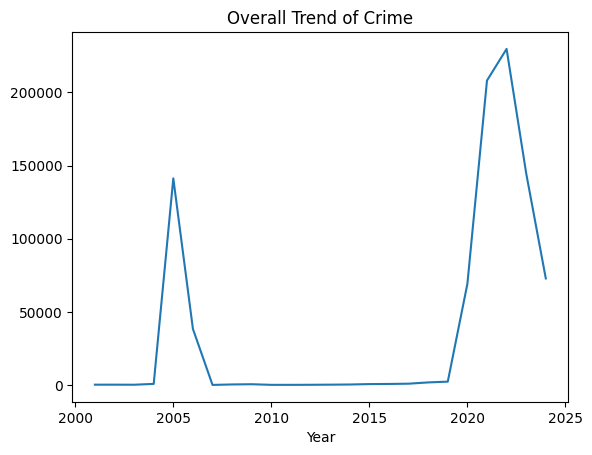

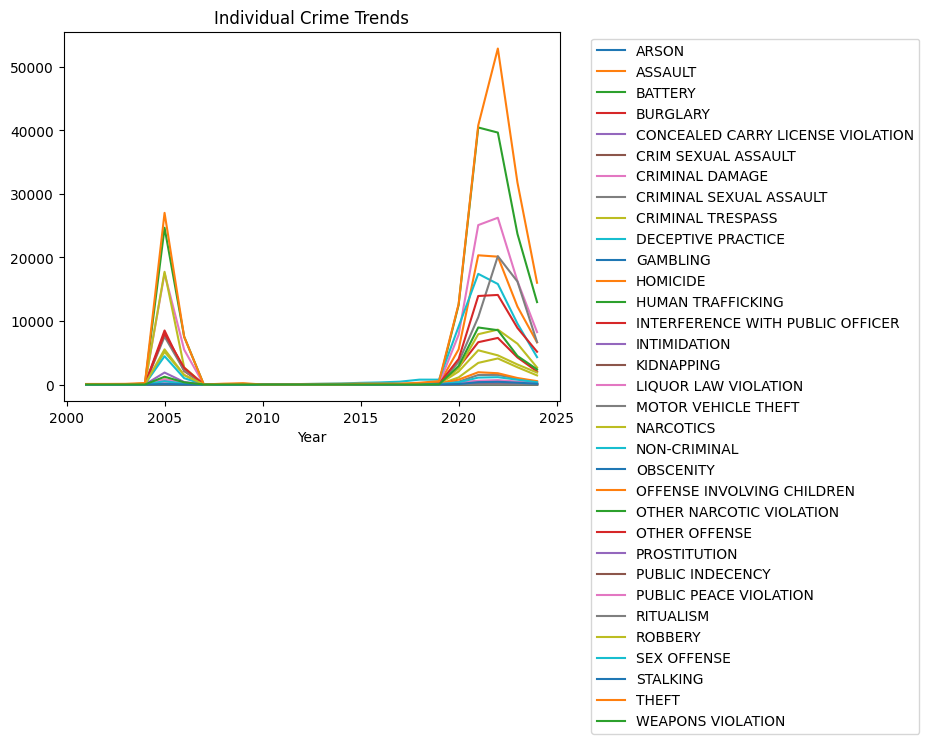

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the crime data

# Calculate overall trend of crime (e.g., total number of crimes per year)
total_crime_trend = df_dt.groupby('Year').size()

# Calculate individual crime trends (e.g., number of occurrences for each crime type per year)
distinct_crime_trends = df.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)

# Plot overall trend of crime
total_crime_trend.plot(kind='line', title='Overall Trend of Crime')

# Plot individual crime trends
ax = distinct_crime_trends.plot(kind='line', title='Individual Crime Trends')

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Show the plots
plt.show()


- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?
   - From the visualization above, there're no individual crimes that are decreasing while the overall crime is increasing or vice-versa.

## Topic 4) Comparing Months:

In [17]:
## Extracting the Month
df_dt['Month'] = df_dt.index.month
df_dt['MonthName'] = df_dt.index.month_name()

In [18]:
# saving lookup for number vs name
unique_months = df_dt.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

<ipython-input-19-09fc547bb386>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_dt, x='MonthName',palette='dark',order=month_lookup.values());
<ipython-input-19-09fc547bb386>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


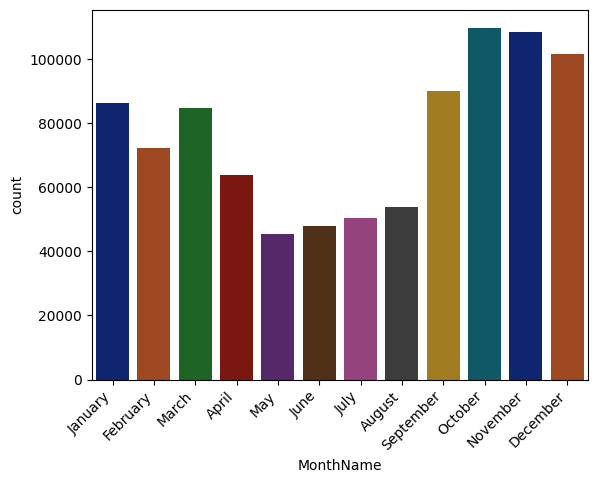

In [19]:
import seaborn as sns

#The plot
ax = sns.countplot(data=df_dt, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

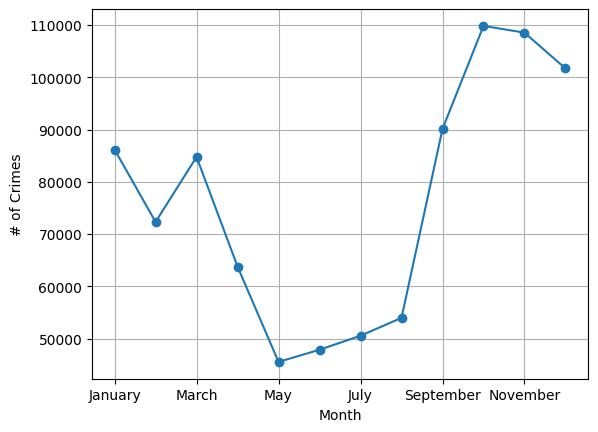

In [20]:
##  month counts
month_counts = df_dt['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');


- ​What months have the most crime?
    - When we look at the visualization above, the most crime is in the months between September-December, with the peak crime observed in the month of October.
- What months have the least?
    - When we look at the visualization above, the months with the least crime are between May - August, with the significant drop observed in the month of May.
- Are there any individual crimes that do not follow this pattern? If so, which crimes?
   - Basing on the above visualization, you can't easily answer this question since the crimes have been aggregated monthly. It's worth exploring using a seasonality approach for each individual crime.

### Seasonality

In [52]:
# Create a pivot table with 'Primary Type' values as columns and counts as values
crimes = pd.pivot_table(df_dt, index=df_dt.index, columns='Primary Type', aggfunc='size',fill_value=0)

In [53]:
crimes_ts = crimes.copy()
crimes_ts

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,0,0,0,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,3,0
2001-01-01 00:01:00,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,3,0
2001-01-01 08:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2001-01-01 08:30:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2001-01-01 09:00:00,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-21 23:47:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2024-04-21 23:54:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-04-21 23:55:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- I see two colmuns 'CRIM SEXUAL ASSAULT' & 'CRIMINAL SEXUAL ASSAULT' which seem to be the same crime. I will addressing this by mergining data from 'CRIM SEXUAL ASSAULT' to 'CRIMINAL SEXUAL ASSAULT' as seen below:

In [63]:
crimes_ts.columns

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON-CRIMINAL', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
       'OTHER NARCOTIC VIOLATION', 'OTHER OFFENSE', 'PROSTITUTION',
       'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY',
       'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type')

In [71]:
# Assuming df is your DataFrame containing the two columns 'crim sexual assault' and 'Crime sexual assault'

# Merge the data from both columns into the 'Crime sexual assault' column
crimes_ts['CRIMINAL SEXUAL ASSAULT'] = crimes_ts['CRIMINAL SEXUAL ASSAULT'].combine_first(crimes_ts['CRIM SEXUAL ASSAULT'])

# Drop the 'crim sexual assault' column
crimes_ts.drop(columns=['CRIM SEXUAL ASSAULT'],inplace=True)


In [73]:
crimes_ts.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,0,0,0,0,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,3,0
2001-01-01 00:01:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3,0
2001-01-01 08:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2001-01-01 08:30:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2001-01-01 09:00:00,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,3,0


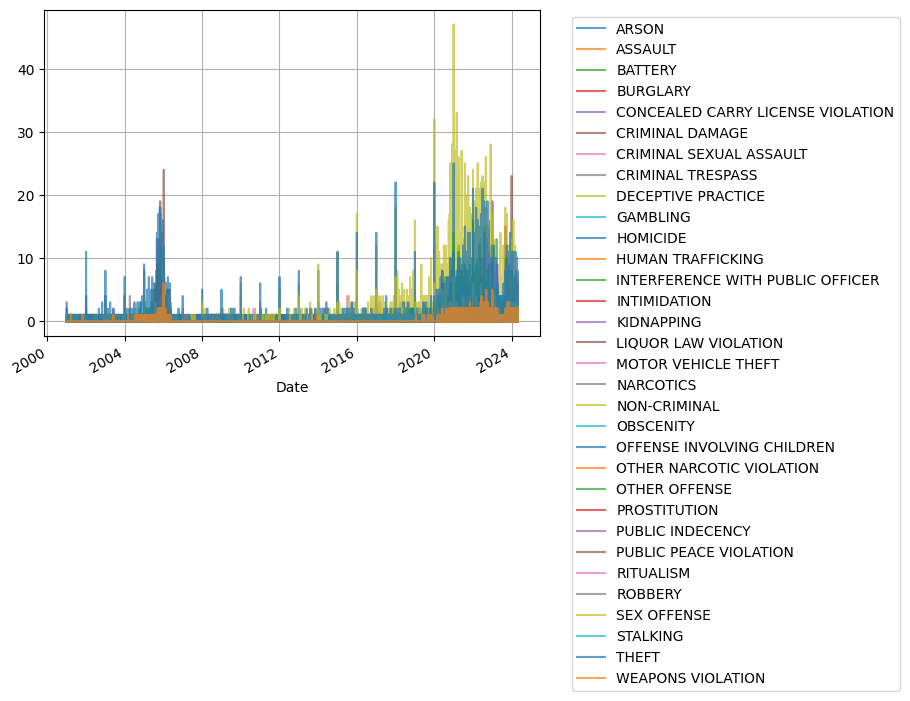

In [74]:
ax= crimes_ts.plot(grid=True,alpha=0.7)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1));

- With this visualization I can't descipher much. Let's try plotting the crimes with a larger frequency, maybe weekly.

### Weekly resampling.

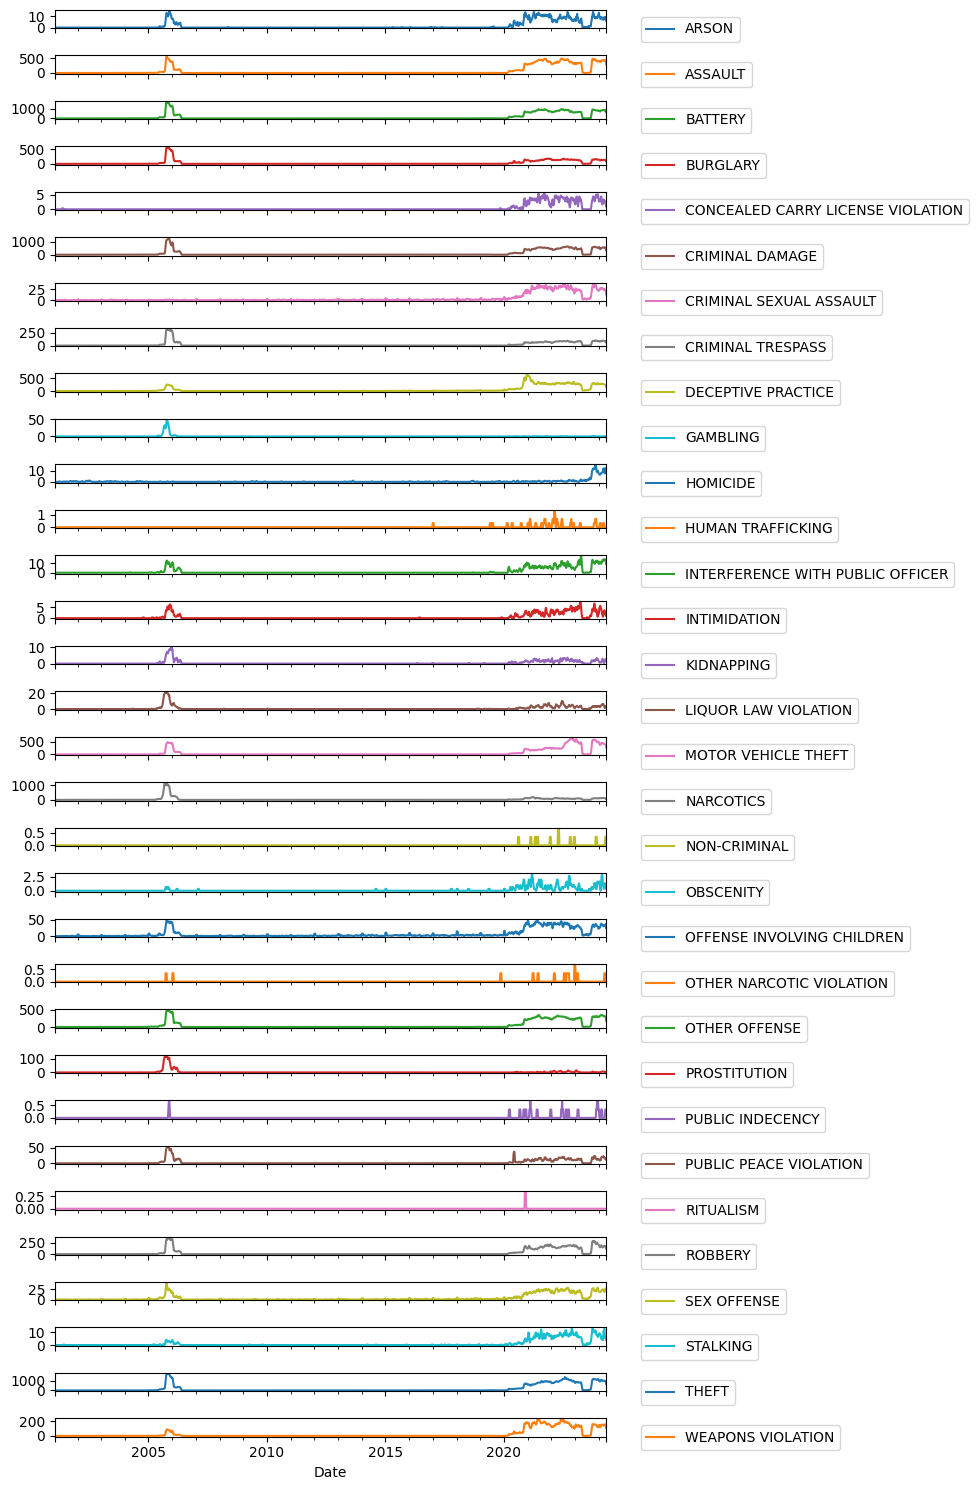

In [79]:
#Resampling with a larger frequency (Weekly)
crimes_W = crimes_ts.resample('W').sum()

#Plotting with a rolling mean with a window of 3 weeks
ax= crimes_W.rolling(3).mean().dropna().plot(subplots=True,figsize=(10,15))

# Add legend to each subplot
for subplot in ax:
    subplot.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


- To answer the question again: Are there any individual crimes that do not follow this pattern? If so, which crimes?
  - Yes there are individual crimes that do not follow the overall pattern. These are: CONCEALED CARRY LICENSE VIOLATION,  CRIMINAL SEXUAL ASSAULT,  GAMBLING,  HOMICIDE,  HUMAN TRAFFICKING,  NON-CRIMINAL,  PROSTITUTION,  and RITUALISM.